In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from elasticsearch_dsl import Search, Q
from elasticsearch_dsl.connections import connections
from elasticsearch import Elasticsearch

# Create a connection
connections.create_connection(hosts=['localhost'], timeout=60)
#text_emotion sur un input

<Elasticsearch([{'host': 'localhost'}])>

### Cell 1 - Distribution of sentiments for a patient's texts

In [12]:
# Initialize the search
s = Search(index="notes")

# Define the patient's first and last name
patient_firstname = "Kimberly"
patient_lastname = "Baker"

# Add a query to filter on the patient's first and last name
s = s.query("match", patient_firstname=patient_firstname)
s = s.query("match", patient_lastname=patient_lastname)

# Execute the search
response = s.execute()

# Create a DataFrame from the hits
df = pd.DataFrame((d.to_dict() for d in s.scan()))

# Display the DataFrame
df

/home/thomas59/anaconda3/envs/machine-learning/lib/python3.10/site-packages/elasticsearch/connection/base.py:200: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  warnings.warn(message, category=ElasticsearchWarning)


,patient_firstname,patient_lastname,date,text,emotion,confidence
0,Kimberly,Baker,1986-09-18,i feel supportive of him i also cant help but ...,love,0.601294
1,Kimberly,Baker,2019-07-01,im then left feeling quite embarrassed as i sa...,sadness,0.685029
2,Kimberly,Baker,1983-04-14,i feel for these kids because you know theyre ...,happy,0.428009
3,Kimberly,Baker,1972-10-29,im currently feeling way fucked up with the mo...,anger,0.683343
4,Kimberly,Baker,1978-08-01,i feel so terribly that i have ignored her swe...,sadness,0.359202
5,Kimberly,Baker,1990-12-04,i tell the people closest to me things that i ...,surprise,0.894909
6,Kimberly,Baker,2021-12-01,im sitting at the spare desk feeling totally d...,sadness,0.512179
7,Kimberly,Baker,2008-08-23,i woke up feeling grouchy and irritable didn t...,anger,0.755193
8,Kimberly,Baker,1996-02-13,im still feeling adventurous ill develop the o...,happy,0.772915
9,Kimberly,Baker,1996-05-24,i feel embarrassed that im doing it because i ...,sadness,0.525908


### Cell 2 - Distribution of sentiments with specific words

/home/thomas59/anaconda3/envs/machine-learning/lib/python3.10/site-packages/elasticsearch/connection/base.py:200: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  warnings.warn(message, category=ElasticsearchWarning)


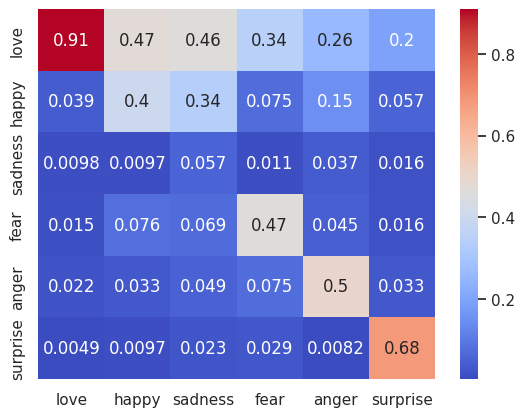

,love,happy,sadness,fear,anger,surprise
love,0.909314,0.472868,0.462725,0.344828,0.262295,0.195122
happy,0.039216,0.399225,0.339332,0.074713,0.147541,0.056911
sadness,0.009804,0.009690,0.056555,0.011494,0.036885,0.016260
fear,0.014706,0.075581,0.069409,0.465517,0.045082,0.016260
anger,0.022059,0.032946,0.048843,0.074713,0.500000,0.032520
surprise,0.004902,0.009690,0.023136,0.028736,0.008197,0.682927


In [13]:
# Initialize a new search
s = Search(index="notes")

# Execute the search
response = s.execute()

# Create a DataFrame from the hits
df = pd.DataFrame((d.to_dict() for d in s.scan()))

# Get the unique sentiments
sentiments = df['emotion'].unique()

# Initialize a dictionary to store the results
results = {}

# For each sentiment
for sentiment in sentiments:
    # Initialize a dictionary to store the counts
    results[sentiment] = {}
    
    # For each sentiment word
    for word in sentiments:
        # Count the number of documents that contain the word
        count = df[(df['emotion'] == sentiment) & (df['text'].str.contains(word))].shape[0]
        
        # Store the count in the results
        results[sentiment][word] = count

# Convert the results to a DataFrame
df_results = pd.DataFrame(results)

# Calculate the percentages
df_percentages = df_results / df_results.sum()

# Plot a heatmap
sns.heatmap(df_percentages, annot=True, cmap='coolwarm')
plt.show()
df_percentages

### Cell 3 - Number of texts corresponding to stages of grief

In [14]:
# Define the stages of grief
stages_of_grief = ["denial", "anger", "bargaining", "depression", "acceptance"]

# For each stage of grief
for stage in stages_of_grief:
    # Initialize the search
    s = Search(index="notes")
    
    # Add a query to match the stage of grief
    s = s.query("match", text=stage)
    
    # Execute the search
    response = s.execute()
    
    # Print the number of hits
    print(f"Number of texts for '{stage}': {response.hits.total.value}")

Number of texts for 'denial': 2
Number of texts for 'anger': 66
Number of texts for 'bargaining': 0
Number of texts for 'depression': 23
Number of texts for 'acceptance': 9


/home/thomas59/anaconda3/envs/machine-learning/lib/python3.10/site-packages/elasticsearch/connection/base.py:200: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  warnings.warn(message, category=ElasticsearchWarning)


### Cell 4 - Number of texts corresponding to stages of grief with fuzzy search

In [15]:
# For each stage of grief
for stage in stages_of_grief:
    # Initialize the search
    s = Search(index="notes")
    
    # Add a fuzzy query to match the stage of grief
    s = s.query(Q("fuzzy", text={"value": stage, "fuzziness": 2}))
    
    # Execute the search
    response = s.execute()
    
    # Print the number of hits
    print(f"Number of texts for '{stage}' (fuzzy search): {response.hits.total.value}")

Number of texts for 'denial' (fuzzy search): 119
Number of texts for 'anger' (fuzzy search): 1002
Number of texts for 'bargaining' (fuzzy search): 0
Number of texts for 'depression' (fuzzy search): 84
Number of texts for 'acceptance' (fuzzy search): 71


### Questions Théoriques

- **Qu’est ce que le sharding ?**
    Le sharding est une méthode utilisée par Elasticsearch pour diviser les données en plusieurs parties, appelées "shards" ou "fragments". Cette technique permet de répartir les données sur plusieurs serveurs, ce qui améliore les performances de recherche et de traitement des données.


    
- **Comment pourrait-on imaginer un sharding sur cet index ?**
     Pour mettre en place le sharding sur cet index, on pourrait envisager une stratégie basée sur les émotions. En d'autres termes, chaque shard contiendrait toutes les notes associées à une émotion spécifique. Cette approche optimiserait les requêtes basées sur les émotions, qui sont un aspect central de votre application. Lors de la recherche d'informations sur une émotion spécifique, Elasticsearch n'aurait besoin de chercher que dans un seul shard, ce qui améliorerait considérablement les performances de recherche.
    


- **Quels ingestion pipelines seraient pertinents pour notre sujet ?**
    - Pour notre sujet, deux pipelines d'ingestion seraient particulièrement pertinents :
    
        - Un pipeline de traitement du texte, qui prépare les notes des patients pour l'indexation. Ce pipeline effectue plusieurs tâches, comme la tokenisation du texte, la suppression de la ponctuation et des émojis, la gestion des stopwords, et la lemmatisation ou le stemming.
        - Un pipeline de prédiction d'émotion, qui utilise notre modèle de machine learning pour prédire l'émotion associée à chaque note. Les résultats de cette prédiction sont ensuite ajoutés aux champs "emotion" et "confidence" de chaque document avant qu'ils ne soient indexés.

    Ces pipelines garantissent que nos données sont correctement préparées et enrichies avant l'indexation, ce qui optimise les performances de recherche et d'analyse.



### Alternative


**Comment aurait-on pu intégrer la gestion des stopwords au niveau du Mapping? (proposez un code)?**

https://www.elastic.co/guide/en/elasticsearch/reference/current/analysis-stop-analyzer.html

In [ ]:
PUT /notes
{
  "settings": {
    "analysis": {
      "analyzer": {
        "my_custom_analyzer": {
          "type": "standard",
          "stopwords": ["_english_"] 
        }
      }
    }
  },
  "mappings": {
    "properties": {
      "text": {
        "type": "text",
        "analyzer": "my_custom_analyzer"
      },
      "patient_lastname": {
        "type": "keyword"
      },
      "patient_firstname": {
        "type": "keyword"
      },
      "date": {
        "type": "date"
      },
      "patient_left": {
        "type": "boolean"
      },
      "emotion": {
        "type": "keyword"
      },
      "confidence": {
        "type": "float"
      }
    }
  }
}


**Comment aurait-on pu intégrer le modèle de ML comme ingest pipeline? (proposez un code) ?**